### Sample Notebook - Heidi

In [1]:
#import relevant packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
%matplotlib inline
from sklearn.model_selection import train_test_split
import sklearn.preprocessing

import seaborn as sns

## Example Dataset

In [2]:
jira_data = pd.read_csv('data/Atlassian_Jira.csv',low_memory=False)
date_created = pd.to_datetime(jira_data['Created'])
date_resolved = pd.to_datetime(jira_data['Resolved'])
jira_data['Resolution Time'] = date_resolved - date_created
jira_data['Resolution Time'] = jira_data['Resolution Time'].dt.total_seconds() / (60 * 60 * 24 * 3)
jira_data['Summary'] = jira_data['Summary'].str.lower()
jira_data['weekday_created'] = pd.to_datetime(jira_data['Created']).dt.weekday
jira_data['Created'] = pd.to_datetime(jira_data['Created'])

In [3]:
jira_new_df = jira_data[[
    'Resolution Time',
    'Issue Type',
    'Project lead',
    'Votes',
    'Assignee',
    'Fix Version/s',
    'weekday_created',
    'Labels',
    'Labels.1',
    'Created']].copy()

num_issuetypes = {"Story":1,"Bug":2,"New Feature":3,"Support Request":4,"UX Story":5,"Improvement":6,"Task":7,"Sub-task":8,"Development Task":9,"Suggestion":10}
num_priority = {"Low":1,"Medium":2,"High":3,"Highest":4}

def values_to_dict(column_name):
    unique_values = jira_new_df[column_name].unique()
    numbered_dict = dict(zip(unique_values,range(1, len(unique_values)+1))) 
    return jira_new_df[column_name].apply(numbered_dict.get).astype(float)

jira_new_df['Issue Type'] = jira_new_df['Issue Type'].apply(num_issuetypes.get).astype(float)
#jira_new_df['Priority'] = jira_new_df['Priority'].apply(num_priority.get).astype(float)
#jira_new_df['Creator'] = values_to_dict('Creator')
jira_new_df['Project lead'] = values_to_dict('Project lead')
jira_new_df['Assignee'] = values_to_dict('Assignee')
jira_new_df['Fix Version/s'] = values_to_dict('Fix Version/s')
jira_new_df['Labels'] = values_to_dict('Labels')
jira_new_df['Labels.1'] = values_to_dict('Labels.1')

q = jira_new_df["Resolution Time"].quantile(0.70)
jira_new_df = jira_new_df[jira_new_df["Resolution Time"] > 0.5]
jira_new_df = jira_new_df[jira_new_df["Resolution Time"] < q]
jira_new_df['Resolution Time'] = jira_new_df["Resolution Time"].astype(int)


    


In [4]:
jira_new_df.describe()

,Resolution Time,Issue Type,Project lead,Votes,Assignee,Fix Version/s,weekday_created,Labels,Labels.1
count,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000
mean,23.723404,4.102837,5.468085,6.262411,39.705674,34.487589,2.221631,14.005319,14.365248
std,27.099870,3.462059,4.064844,27.465048,56.108293,52.011901,1.551540,27.907643,32.127929
min,0.000000,1.000000,1.000000,0.000000,1.000000,2.000000,0.000000,1.000000,1.000000
25%,3.000000,2.000000,2.000000,0.000000,1.000000,2.000000,1.000000,1.000000,1.000000
50%,11.000000,2.000000,5.000000,0.500000,1.000000,2.000000,2.000000,3.000000,1.000000
75%,40.250000,8.250000,7.000000,3.250000,64.000000,52.500000,4.000000,5.000000,7.000000
max,98.000000,10.000000,19.000000,576.000000,194.000000,198.000000,6.000000,139.000000,150.000000


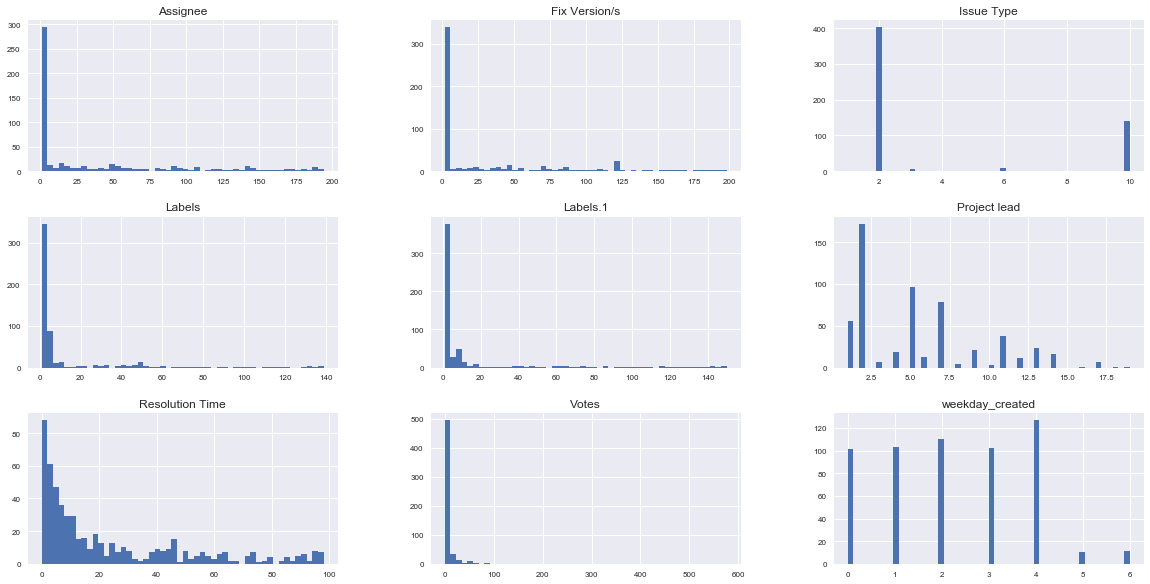

In [5]:
jira_new_df.hist(figsize=(20, 10), bins=50, xlabelsize=8, ylabelsize=8);

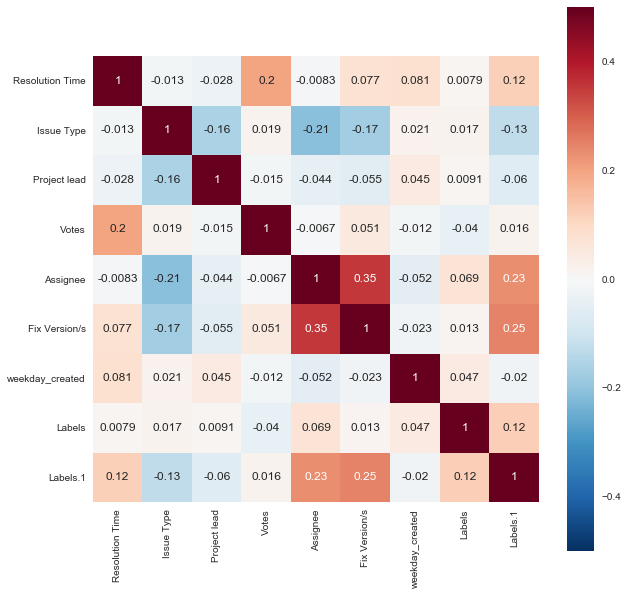

In [6]:
plt.figure(figsize=(10,10))
foo = sns.heatmap(jira_new_df.corr(), vmax=0.5, square=True, annot=True)